In [15]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\Mayank Yadav\anaconda\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))


C:\Users\Mayank Yadav\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
            history = model.fit(x= x_train, y = y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 198s 430ms/step - accuracy: 0.1974 - loss: 2.2618 - val_accuracy: 0.2586 - val_loss: 1.8869
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 204s 453ms/step - accuracy: 0.3567 - loss: 1.6653 - val_accuracy: 0.4343 - val_loss: 1.4958
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 217s 480ms/step - accuracy: 0.4602 - loss: 1.4050 - val_accuracy: 0.4689 - val_loss: 1.4158
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 207s 458ms/step - accuracy: 0.5092 - loss: 1.2835 - val_accuracy: 0.5085 - val_loss: 1.2902
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 201s 446ms/step - accuracy: 0.5446 - loss: 1.2007 - val_accuracy: 0.5416 - val_loss: 1.2231
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 204s 452ms/step - accuracy: 0.5610 - loss: 1.1512 - val_accuracy: 0.5725 - val_loss: 1.1459
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 198s 438ms/step - accuracy: 0.5814 - loss: 1.1050 - val_accuracy: 0.5621 - val_loss: 1.1671
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 199s 440ms/step - accuracy: 

Epoch 50/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 209s 464ms/step - accuracy: 0.8997 - loss: 0.2786 - val_accuracy: 0.6373 - val_loss: 1.4021
Epoch 51/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 208s 461ms/step - accuracy: 0.9061 - loss: 0.2690 - val_accuracy: 0.6380 - val_loss: 1.4192
Epoch 52/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 209s 463ms/step - accuracy: 0.9031 - loss: 0.2718 - val_accuracy: 0.6282 - val_loss: 1.4277
Epoch 53/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 217s 481ms/step - accuracy: 0.9054 - loss: 0.2705 - val_accuracy: 0.6390 - val_loss: 1.4172
Epoch 54/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 218s 484ms/step - accuracy: 0.9092 - loss: 0.2539 - val_accuracy: 0.6329 - val_loss: 1.4734
Epoch 55/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 220s 487ms/step - accuracy: 0.9054 - loss: 0.2647 - val_accuracy: 0.6325 - val_loss: 1.4234
Epoch 56/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 218s 483ms/step - accuracy: 0.9071 - loss: 0.2616 - val_accuracy: 0.6360 - val_loss: 1.4491
Epoch 57/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 218s 482ms/step - ac

Epoch 99/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 244s 541ms/step - accuracy: 0.9400 - loss: 0.1708 - val_accuracy: 0.6387 - val_loss: 1.6754
Epoch 100/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 243s 539ms/step - accuracy: 0.9435 - loss: 0.1589 - val_accuracy: 0.6162 - val_loss: 1.7910


In [19]:
# Print the accuracy values
print("Training Accuracy:", history.history['accuracy'])
//print("Validation Accuracy:", history.history['val_accuracy'])

Training Accuracy: [0.23170605301856995, 0.38770341873168945, 0.47069844603538513, 0.5149717330932617, 0.54307621717453, 0.5607369542121887, 0.5791263580322266, 0.5981055498123169, 0.6144130825996399, 0.6272162795066833, 0.6412338018417358, 0.6610457897186279, 0.6726345419883728, 0.684535562992096, 0.6993858814239502, 0.7137503623962402, 0.7247840166091919, 0.7331459522247314, 0.7470247149467468, 0.7586135268211365, 0.7704104781150818, 0.7772804498672485, 0.7839075922966003, 0.7967454195022583, 0.8042052388191223, 0.8114222288131714, 0.8189514875411987, 0.8220741748809814, 0.8287706971168518, 0.8321362733840942, 0.8429964184761047, 0.8419902324676514, 0.8475417494773865, 0.8508726358413696, 0.8564241528511047, 0.8586447238922119, 0.8633981943130493, 0.8668332099914551, 0.8668332099914551, 0.8723153471946716, 0.872766375541687, 0.8778321146965027, 0.8804690837860107, 0.8793588280677795, 0.8836265206336975, 0.8877901434898376, 0.8890392184257507, 0.8898025751113892, 0.895319402217865, 0.

In [20]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [1]:
from keras.models import model_from_json

In [2]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [3]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [9]:
from keras.preprocessing.image import load_img

In [12]:
def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [24]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  sad


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
model prediction is  sad


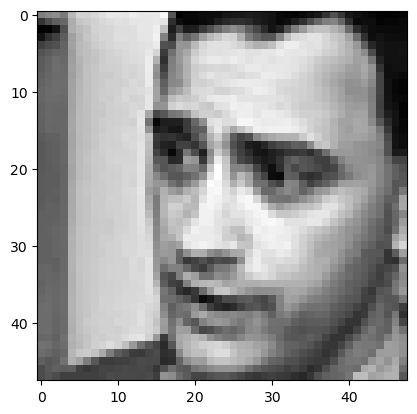

In [29]:
image = 'images/train/sad/127.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
model prediction is  fear


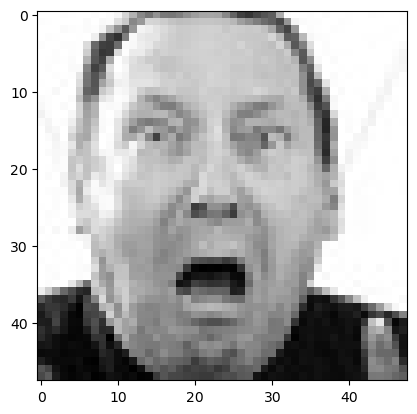

In [30]:
image = 'images/train/fear/1703.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  disgust


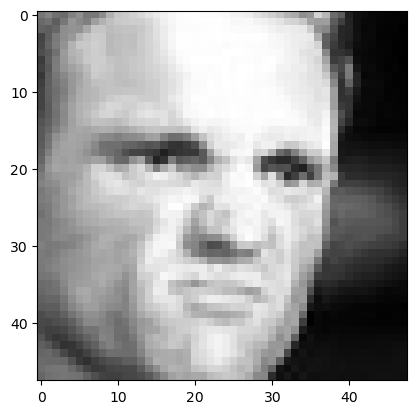

In [31]:
image = 'images/train/disgust/11223.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
model prediction is  happy


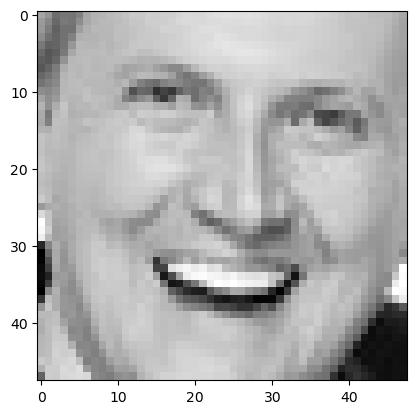

In [33]:
image = 'images/train/happy/156.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
model prediction is  surprise


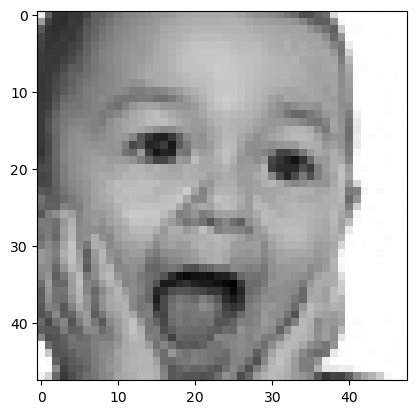

In [32]:
image = 'images/train/surprise/175.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
model prediction is  sad


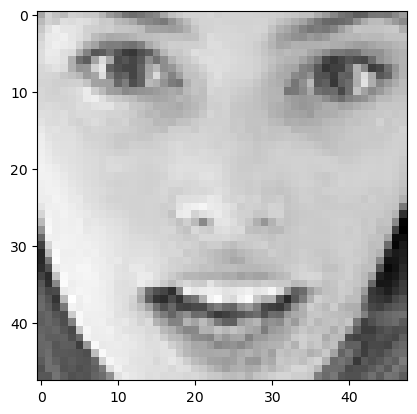

In [34]:
image = 'images/train/surprise/26.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
model prediction is  sad


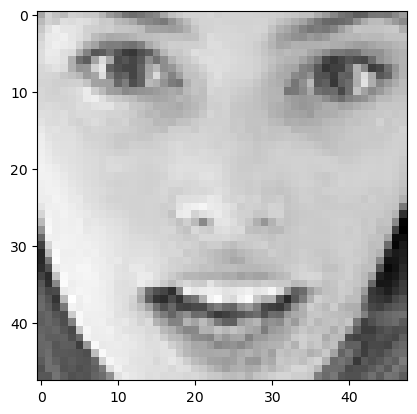

In [35]:
image = 'images/train/surprise/26.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
model prediction is  surprise


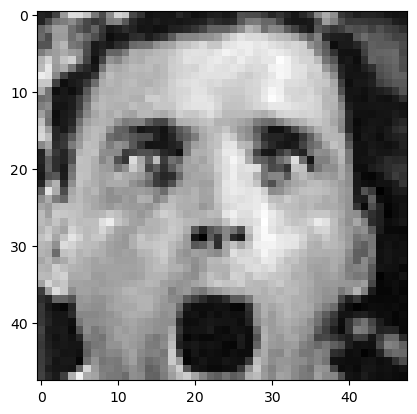

In [36]:
image = 'images/train/surprise/29.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
model prediction is  disgust


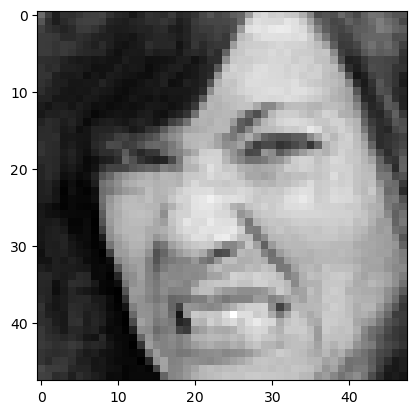

In [37]:
image = 'images/train/disgust/388.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')